# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [1]:
import pandas as pd

df = pd.read_csv('Employee_productivity.csv')

df.head()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 non-null    float64
 2   ProductivityScore    300 non-null    float64
 3   Department           300 non-null    object 
 4   YearsAtCompany       300 non-null    int64  
 5   TeamMeetingsPerWeek  300 non-null    int64  
 6   DeskLocation         300 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ KB


,HoursWorked,FocusScore,ProductivityScore,YearsAtCompany,TeamMeetingsPerWeek
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.225333,6.061000,3114.163733,9.533333,3.003333
std,4.885138,2.076862,1248.635506,5.961040,1.756971
min,22.200000,1.000000,0.000000,0.000000,0.000000
25%,37.275000,4.500000,2254.552500,5.000000,2.000000
50%,40.600000,6.150000,3080.155000,9.000000,3.000000
75%,43.500000,7.625000,3958.905000,15.000000,4.000000
max,53.800000,10.000000,6299.200000,20.000000,9.000000


In [5]:
df_q1 = df[["YearsAtCompany", "HoursWorked", "FocusScore", "ProductivityScore"]].dropna()

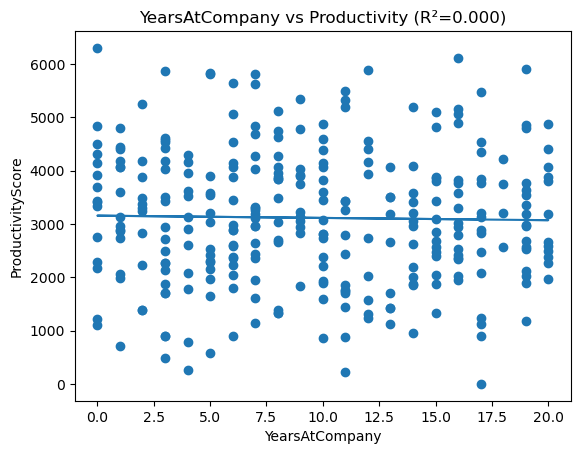

0.00041152919389664255

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare X and y
X_years = df_q1[["YearsAtCompany"]]
y = df_q1["ProductivityScore"]

# Fit model
model_years = LinearRegression()
model_years.fit(X_years, y)

r2_years = model_years.score(X_years, y)

# Plot
plt.figure()
plt.scatter(X_years, y)
plt.plot(X_years, model_years.predict(X_years))
plt.xlabel("YearsAtCompany")
plt.ylabel("ProductivityScore")
plt.title(f"YearsAtCompany vs Productivity (R²={r2_years:.3f})")
plt.show()

r2_years

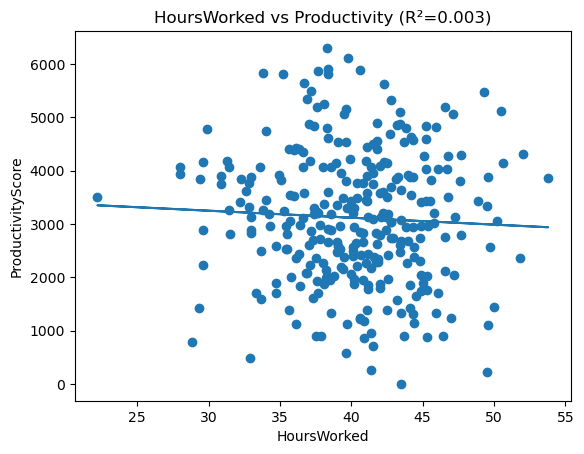

0.0025999350022654077

In [7]:
X_hours = df_q1[["HoursWorked"]]

model_hours = LinearRegression()
model_hours.fit(X_hours, y)

r2_hours = model_hours.score(X_hours, y)

plt.figure()
plt.scatter(X_hours, y)
plt.plot(X_hours, model_hours.predict(X_hours))
plt.xlabel("HoursWorked")
plt.ylabel("ProductivityScore")
plt.title(f"HoursWorked vs Productivity (R²={r2_hours:.3f})")
plt.show()

r2_hours

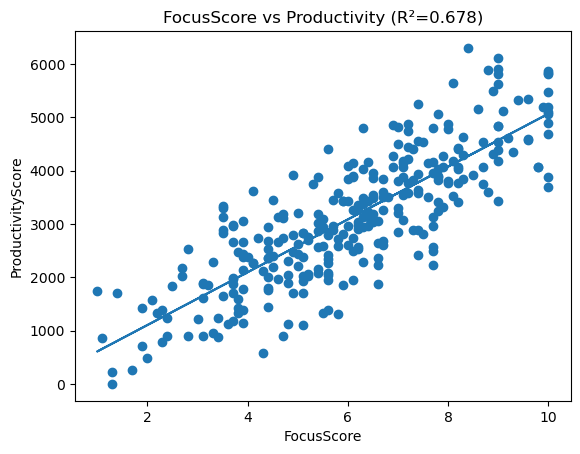

0.6776960770307456

In [8]:
X_focus = df_q1[["FocusScore"]]

model_focus = LinearRegression()
model_focus.fit(X_focus, y)

r2_focus = model_focus.score(X_focus, y)

plt.figure()
plt.scatter(X_focus, y)
plt.plot(X_focus, model_focus.predict(X_focus))
plt.xlabel("FocusScore")
plt.ylabel("ProductivityScore")
plt.title(f"FocusScore vs Productivity (R²={r2_focus:.3f})")
plt.show()

r2_focus

In [9]:
comparison = pd.DataFrame({
    "Feature": ["YearsAtCompany", "HoursWorked", "FocusScore"],
    "R2": [r2_years, r2_hours, r2_focus]
}).sort_values("R2", ascending=False)

comparison

,Feature,R2
2,FocusScore,0.677696
1,HoursWorked,0.002600
0,YearsAtCompany,0.000412


In [12]:
df_model = df.dropna()

df_model = pd.get_dummies(
    df_model,
    columns=["Department", "DeskLocation"],
    drop_first=True
)

In [13]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=["ProductivityScore"])
y = df_model["ProductivityScore"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

full_model = LinearRegression()
full_model.fit(X_train, y_train)

train_r2 = full_model.score(X_train, y_train)
test_r2 = full_model.score(X_test, y_test)

train_r2, test_r2

(0.6946406850570566, 0.6394968240332988)

In [14]:
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": full_model.coef_
}).sort_values("Coefficient", ascending=False)

coef_table

,Feature,Coefficient
1,FocusScore,499.248647
3,TeamMeetingsPerWeek,28.455539
2,YearsAtCompany,3.439204
0,HoursWorked,-5.068004
4,Department_HR,-46.953821
6,Department_Sales,-101.672939
7,DeskLocation_Private Office,-119.409737
8,DeskLocation_Remote,-205.655963
5,Department_Marketing,-227.289950


### Summary of Findings and Recommendations

FocusScore has a strong positive relationship with ProductivityScore (R² ≈ 0.68), while HoursWorked and YearsAtCompany show almost no meaningful linear relationship with productivity. In the full regression model (test R² ≈ 0.64), focus remains the dominant predictor, and working more hours slightly decreases productivity when controlling for other factors. Overall, productivity appears to be driven much more by an employee’s ability to focus than by tenure or total hours worked.

To improve productivity, management should prioritize strategies that increase employee focus, such as reducing unnecessary meetings, limiting interruptions, and creating environments that support deep work and high collaboration (e.g. ensemble/pair programming). Encouraging employees to work longer hours is unlikely to improve output and may even reduce effectiveness.